# Name : Aditya Ranjan Pradhan
# Roll No : 20051620

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# Load dataset
df = pd.read_csv('data.csv')


In [18]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

In [19]:
# Convert diagnosis column to binary labels
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [20]:
# Split dataset into features and labels
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [21]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Define ANN model
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [25]:
# Evaluate model on test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = np.mean(y_pred.flatten() == y_test)
print(f'Test accuracy: {accuracy:.2%}')

4/4 [==============================] - 0s 3ms/step
Test accuracy: 96.49%


In [26]:
# Evaluate model on train set
y_pred_train = model.predict(X_train)
y_tp = (y_pred_train > 0.5).astype(int)
accuracy_train = np.mean(y_tp.flatten() == y_train)
print(f'Test accuracy: {accuracy_train:.2%}')

15/15 [==============================] - 0s 2ms/step
Test accuracy: 99.78%


Confusion matrix:
[[69  2]
 [ 2 41]]


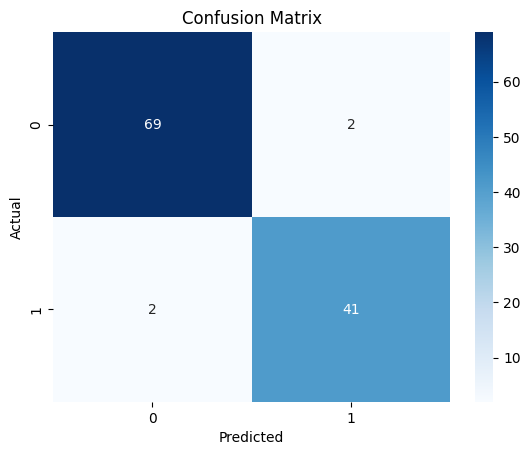

In [27]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{cm}')

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

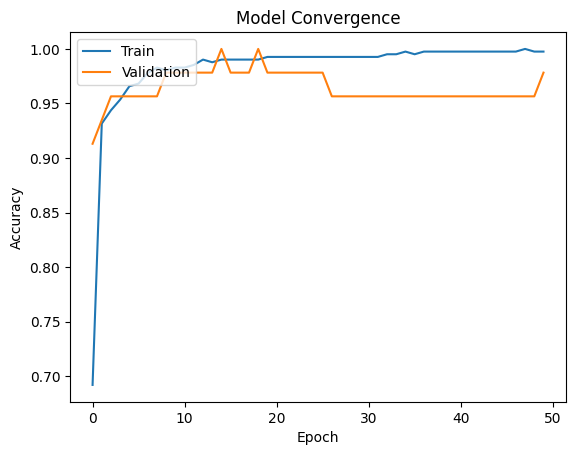

In [28]:
# Generate convergence plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Convergence')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

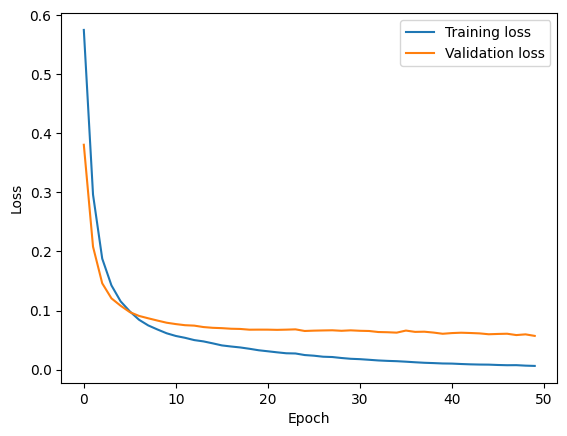

In [29]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy score: 0.9649122807017544
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

